In [1]:
from src.test_non_local_model import load_data

is_ripple, spikes, position, env, time = load_data(work_computer=False)


In [ ]:
# import numpy as np


# is_good_neuron = np.ones((spikes.shape[1],), dtype=bool)
# is_good_neuron[[31, 81, 103]] = False

# spikes = spikes[:, is_good_neuron]

In [ ]:
# import numpy as np


# is_good_neuron = np.zeros((spikes.shape[1],), dtype=bool)
# is_good_neuron[3] = True

# spikes = spikes[:, is_good_neuron]

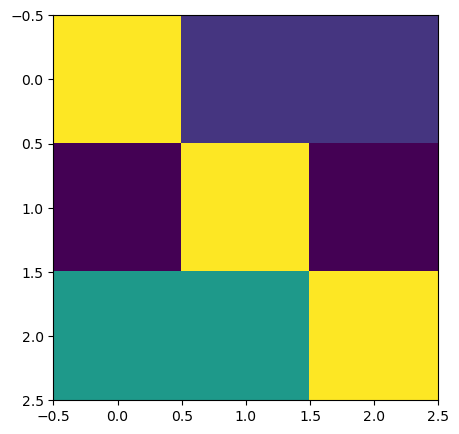

In [131]:
from src.test_non_local_model import setup_nonlocal_hmm_model

(
    design_matrix_hmm,
    predict_matrix_hmm,
    initial_conditions_hmm,
    discrete_state_transitions_hmm,
    zero_rates_hmm,
    is_training_hmm,
    state_names_hmm,
) = setup_nonlocal_hmm_model(is_ripple, spikes, position, env)


In [132]:
from src.test_non_local_model import fit_hmm_model

(
    predicted_state_hmm,
    acausal_posterior_hmm,
    causal_posterior_hmm,
    marginal_log_likelihoods_hmm,
    non_local_rates_hmm,
    initial_conditions_hmm,
    discrete_state_transitions_hmm,
) = fit_hmm_model(
    spikes,
    design_matrix_hmm,
    predict_matrix_hmm,
    initial_conditions_hmm,
    discrete_state_transitions_hmm,
    zero_rates_hmm,
    is_training_hmm,
    fit_inital_conditions=True,
    fit_discrete_transition=True,
    fit_likelihood=True,
)


Likelihoods


  0%|          | 0/104 [00:00<?, ?it/s]

Expectation Step
Maximization Step
Stats
iteration 1, likelihood: -1936239.9938516205
Likelihoods


  0%|          | 0/104 [00:00<?, ?it/s]

Expectation Step
Maximization Step
Stats
iteration 2, likelihood: -1933142.5352411303, change: 3097.4586104901973
Likelihoods


  0%|          | 0/104 [00:00<?, ?it/s]

Expectation Step
Maximization Step
Stats
iteration 3, likelihood: -1930754.3153141895, change: 2388.219926940743
Likelihoods


  0%|          | 0/104 [00:00<?, ?it/s]

Expectation Step
Maximization Step
Stats
iteration 4, likelihood: -1928910.831040503, change: 1843.4842736865394
Likelihoods


  0%|          | 0/104 [00:00<?, ?it/s]

Expectation Step
Maximization Step
Stats
iteration 5, likelihood: -1927573.945632454, change: 1336.8854080489837
Likelihoods


  0%|          | 0/104 [00:00<?, ?it/s]

Expectation Step
Maximization Step
Stats
iteration 6, likelihood: -1926687.4018250885, change: 886.5438073654659
Likelihoods


  0%|          | 0/104 [00:00<?, ?it/s]

Expectation Step
Maximization Step
Stats
iteration 7, likelihood: -1926083.5476814597, change: 603.8541436288506
Likelihoods


  0%|          | 0/104 [00:00<?, ?it/s]

Expectation Step
Maximization Step
Stats
iteration 8, likelihood: -1925765.7451638477, change: 317.80251761199906
Likelihoods


  0%|          | 0/104 [00:00<?, ?it/s]

Expectation Step
Maximization Step
Stats
iteration 9, likelihood: -1925545.536240911, change: 220.20892293658108
Likelihoods


  0%|          | 0/104 [00:00<?, ?it/s]

Expectation Step
Maximization Step
Stats
iteration 10, likelihood: -1925791.3596208615, change: -245.82337995036505
Likelihoods


  0%|          | 0/104 [00:00<?, ?it/s]

Expectation Step
Maximization Step
Stats
iteration 11, likelihood: -1925659.520526467, change: 131.83909439458512


In [ ]:
from src.test_non_local_model import setup_nonlocal_switching_model

(
    design_matrix_switching,
    predict_matrix_switching,
    initial_conditions_switching,
    discrete_state_transitions_switching,
    continuous_state_transitions_switching,
    state_ind_switching,
    zero_rates_switching,
    is_training_switching,
    state_names_switching,
) = setup_nonlocal_switching_model(
    is_ripple,
    spikes,
    position,
    env,
)


In [ ]:
from src.test_non_local_model import fit_switching_model

(
    predicted_state_switching,
    acausal_posterior_switching,
    acausal_state_probabilities_switching,
    causal_posterior_switching,
    marginal_log_likelihoods_switching,
    initial_conditions_switching,
    discrete_state_transitions_switching,
    coefficients_iter,
    local_rates_iter,
    non_local_rates_iter,
    is_training_iter,
    acausal_posterior_iter,
) = fit_switching_model(
    spikes,
    design_matrix_switching,
    predict_matrix_switching,
    initial_conditions_switching,
    discrete_state_transitions_switching,
    continuous_state_transitions_switching,
    state_ind_switching,
    zero_rates_switching,
    is_training_switching,
)

In [ ]:
import matplotlib.pyplot as plt


plt.plot(env.place_bin_centers_, non_local_rates_hmm * 500, linestyle='--', color="lightgrey")
for field in non_local_rates_iter:
    plt.plot(env.place_bin_centers_, field * 500)


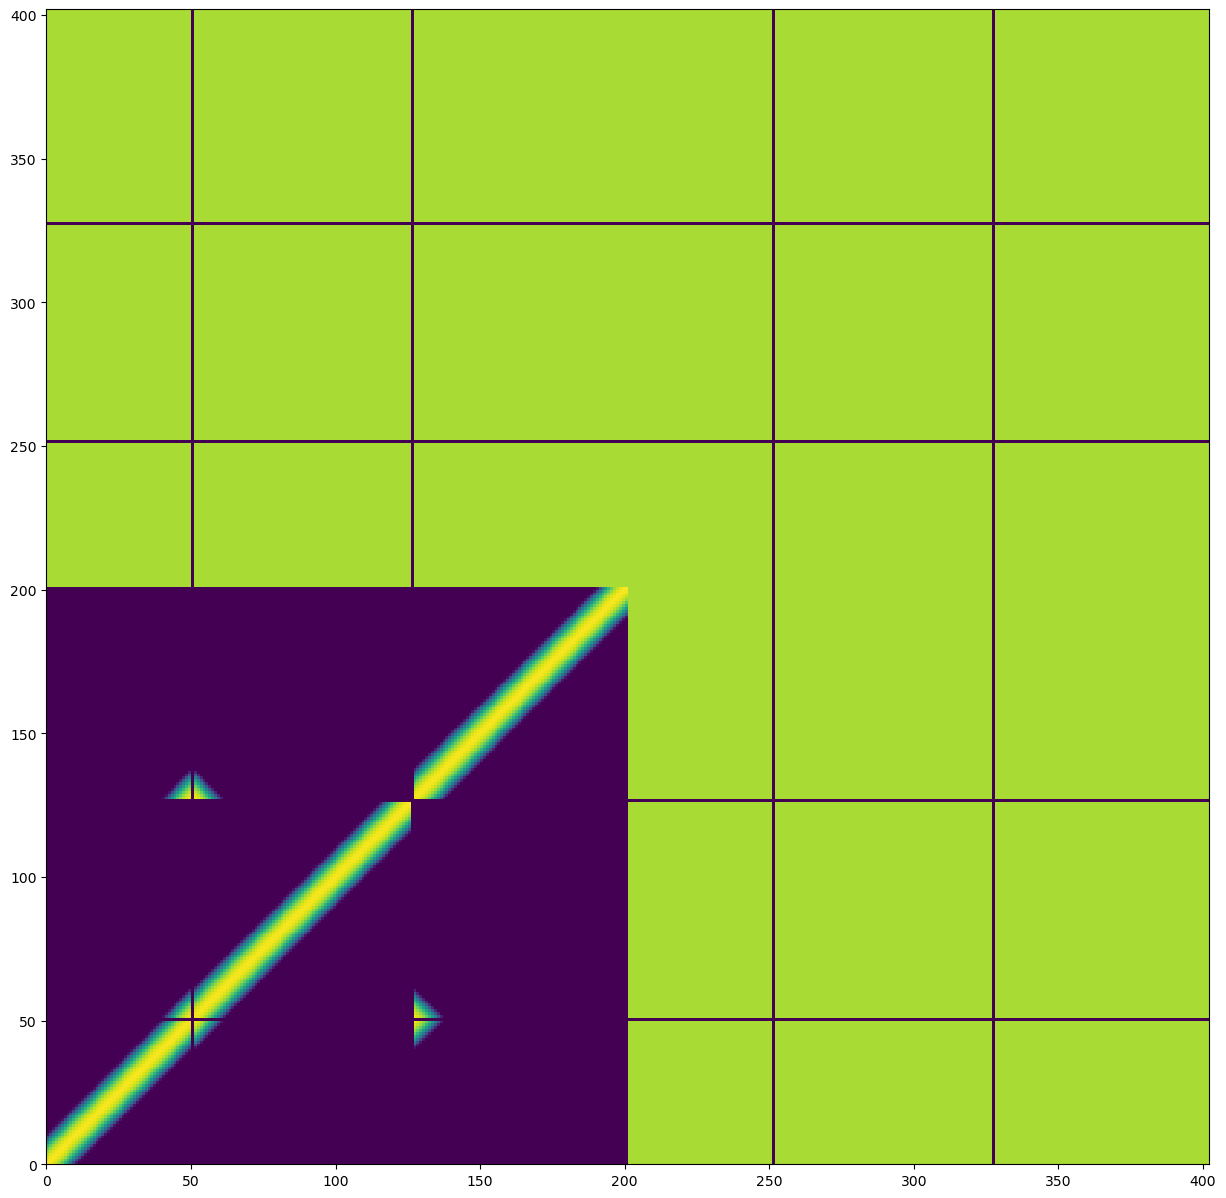

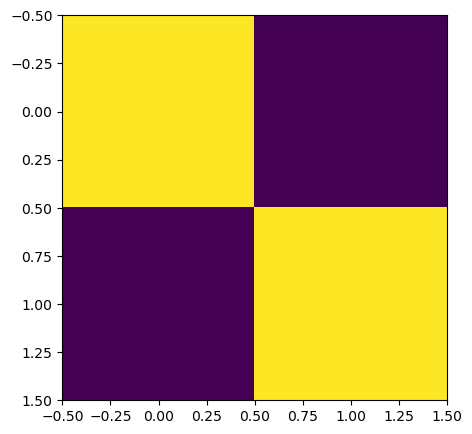

In [2]:
from src.test_non_local_model import setup_contfrag_model, fit_contfrag_model

(
    design_matrix,
    predict_matrix,
    initial_conditions,
    discrete_state_transitions,
    continuous_state_transitions,
    state_ind,
    is_training,
    state_names,
) = setup_contfrag_model(is_ripple, position, env)


In [110]:
(
    predicted_state,
    acausal_posterior,
    acausal_state_probabilities,
    causal_posterior,
    marginal_log_likelihoods,
    initial_conditions,
    discrete_state_transitions,
    coefficients_iter,
    local_rates_iter,
    non_local_rates_iter,
    is_training_iter,
    acausal_posterior_iter,
) = fit_contfrag_model(
    spikes,
    design_matrix,
    predict_matrix,
    initial_conditions,
    discrete_state_transitions,
    continuous_state_transitions,
    state_ind,
    (predicted_state_hmm == 0).astype(float),
    max_iter=1,
)


Likelihoods


  0%|          | 0/104 [00:00<?, ?it/s]

Expectation Step
Maximization Step
Stats
iteration 1, likelihood: -1966940.8684392194


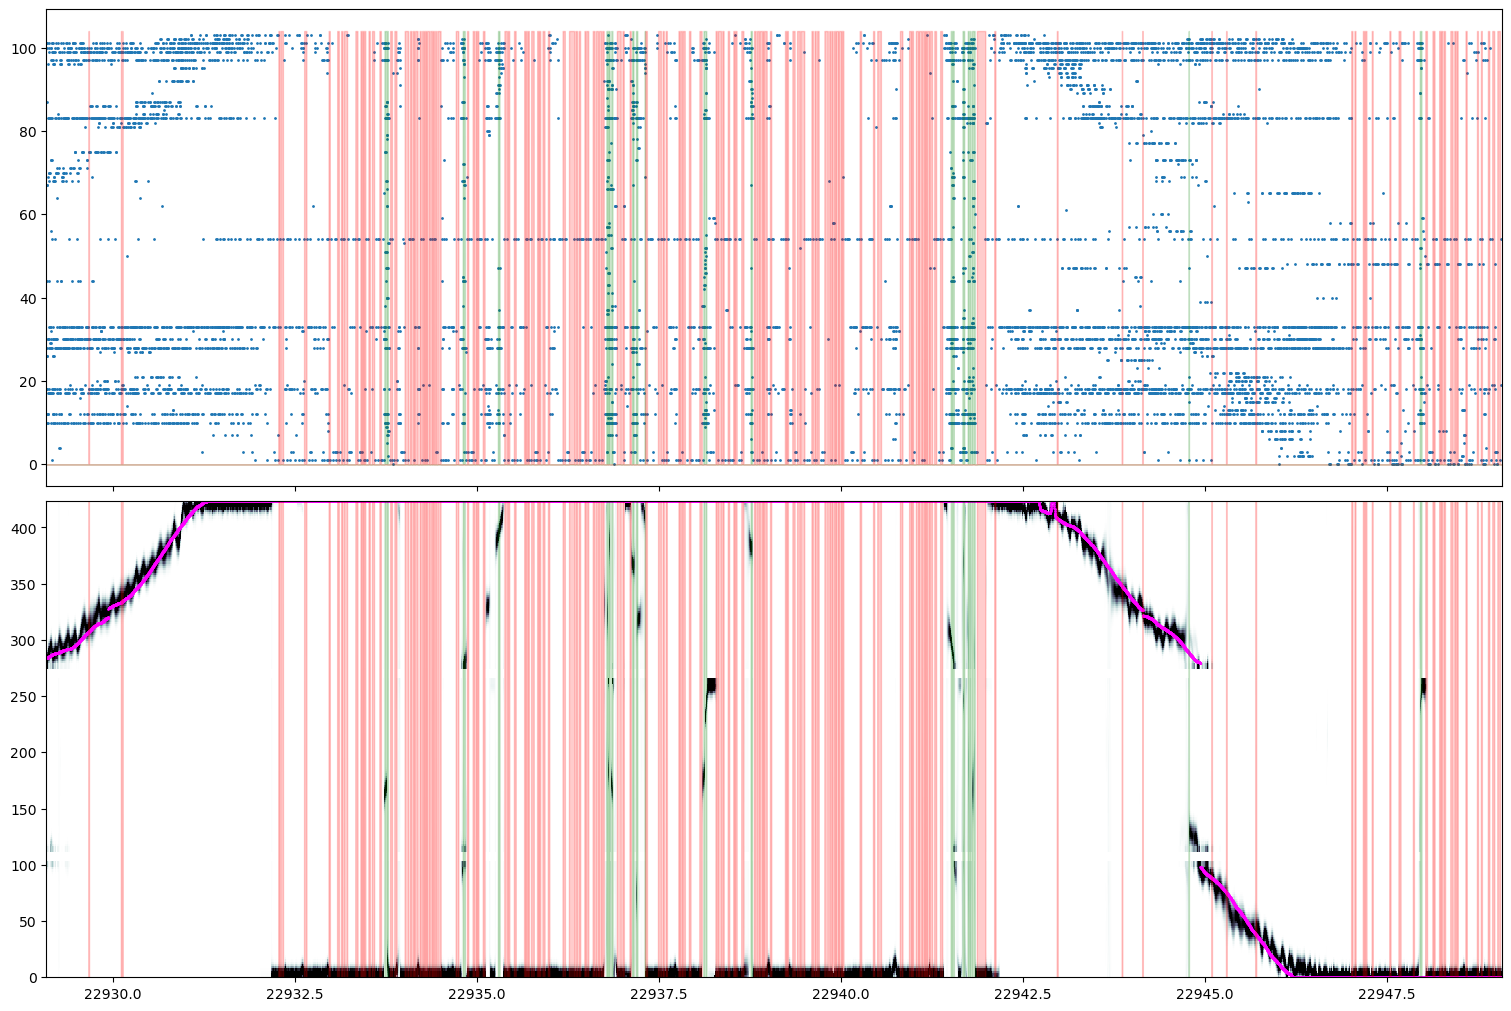

In [134]:
import matplotlib.pyplot as plt
import numpy as np

time_slice = slice(270_000, 280_000)

fig, axes = plt.subplots(2, 1, constrained_layout=True, sharex=True, figsize=(15, 10))
t, x = np.meshgrid(time[time_slice], env.place_bin_centers_)

neuron_sort_ind = np.argsort(
    env.place_bin_centers_[non_local_rates_hmm[-1].argmax(axis=0)].squeeze()
)
spike_time_ind, neuron_ind = np.nonzero(spikes[time_slice][:, neuron_sort_ind])
axes[0].scatter(time[time_slice][spike_time_ind], neuron_ind, s=1)
axes[0].fill_between(time[time_slice], (spikes.shape[1]) * (predicted_state_hmm[time_slice] == 2), alpha=0.2, color='green')
axes[0].fill_between(time[time_slice], (spikes.shape[1]) * (predicted_state_hmm[time_slice] == 1), alpha=0.2, color='red')

axes[1].pcolormesh(t, x, (acausal_posterior[time_slice, state_ind == 0] + acausal_posterior[time_slice, state_ind == 1]).T, vmin=0.0, vmax=0.1, cmap="bone_r")
axes[1].scatter(time[time_slice], position[time_slice], s=1, color="magenta")

axes[1].fill_between(time[time_slice], env.place_bin_edges_.max() * (predicted_state_hmm[time_slice] == 2), alpha=0.2, color='green')
axes[1].fill_between(time[time_slice], env.place_bin_edges_.max() * (predicted_state_hmm[time_slice] == 1), alpha=0.2, color='red')

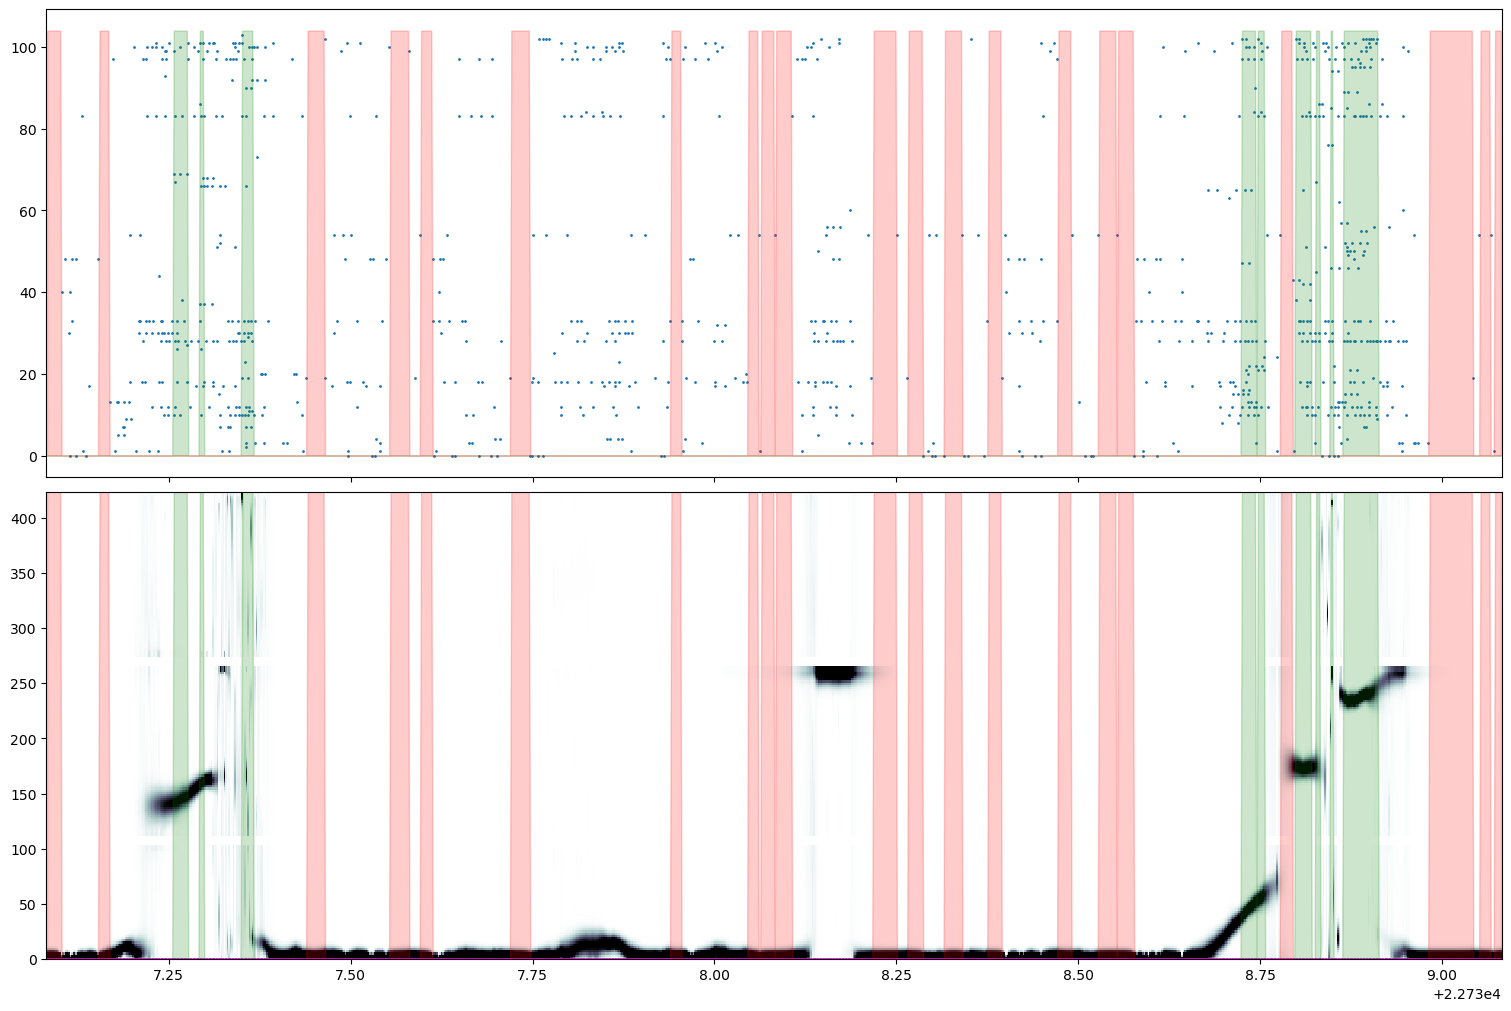

In [142]:
import matplotlib.pyplot as plt
import numpy as np

time_slice = slice(174_000, 175_000)

fig, axes = plt.subplots(2, 1, constrained_layout=True, sharex=True, figsize=(15, 10))
t, x = np.meshgrid(time[time_slice], env.place_bin_centers_)

neuron_sort_ind = np.argsort(
    env.place_bin_centers_[non_local_rates_hmm[-1].argmax(axis=0)].squeeze()
)
spike_time_ind, neuron_ind = np.nonzero(spikes[time_slice][:, neuron_sort_ind])
axes[0].scatter(time[time_slice][spike_time_ind], neuron_ind, s=1)
axes[0].fill_between(time[time_slice], (spikes.shape[1]) * (predicted_state_hmm[time_slice] == 2), alpha=0.2, color='green')
axes[0].fill_between(time[time_slice], (spikes.shape[1]) * (predicted_state_hmm[time_slice] == 1), alpha=0.2, color='red')

axes[1].pcolormesh(t, x, (acausal_posterior[time_slice, state_ind == 0] + acausal_posterior[time_slice, state_ind == 1]).T, vmin=0.0, vmax=0.1, cmap="bone_r")
axes[1].scatter(time[time_slice], position[time_slice], s=1, color="magenta")

axes[1].fill_between(time[time_slice], env.place_bin_edges_.max() * (predicted_state_hmm[time_slice] == 2), alpha=0.2, color='green')
axes[1].fill_between(time[time_slice], env.place_bin_edges_.max() * (predicted_state_hmm[time_slice] == 1), alpha=0.2, color='red')

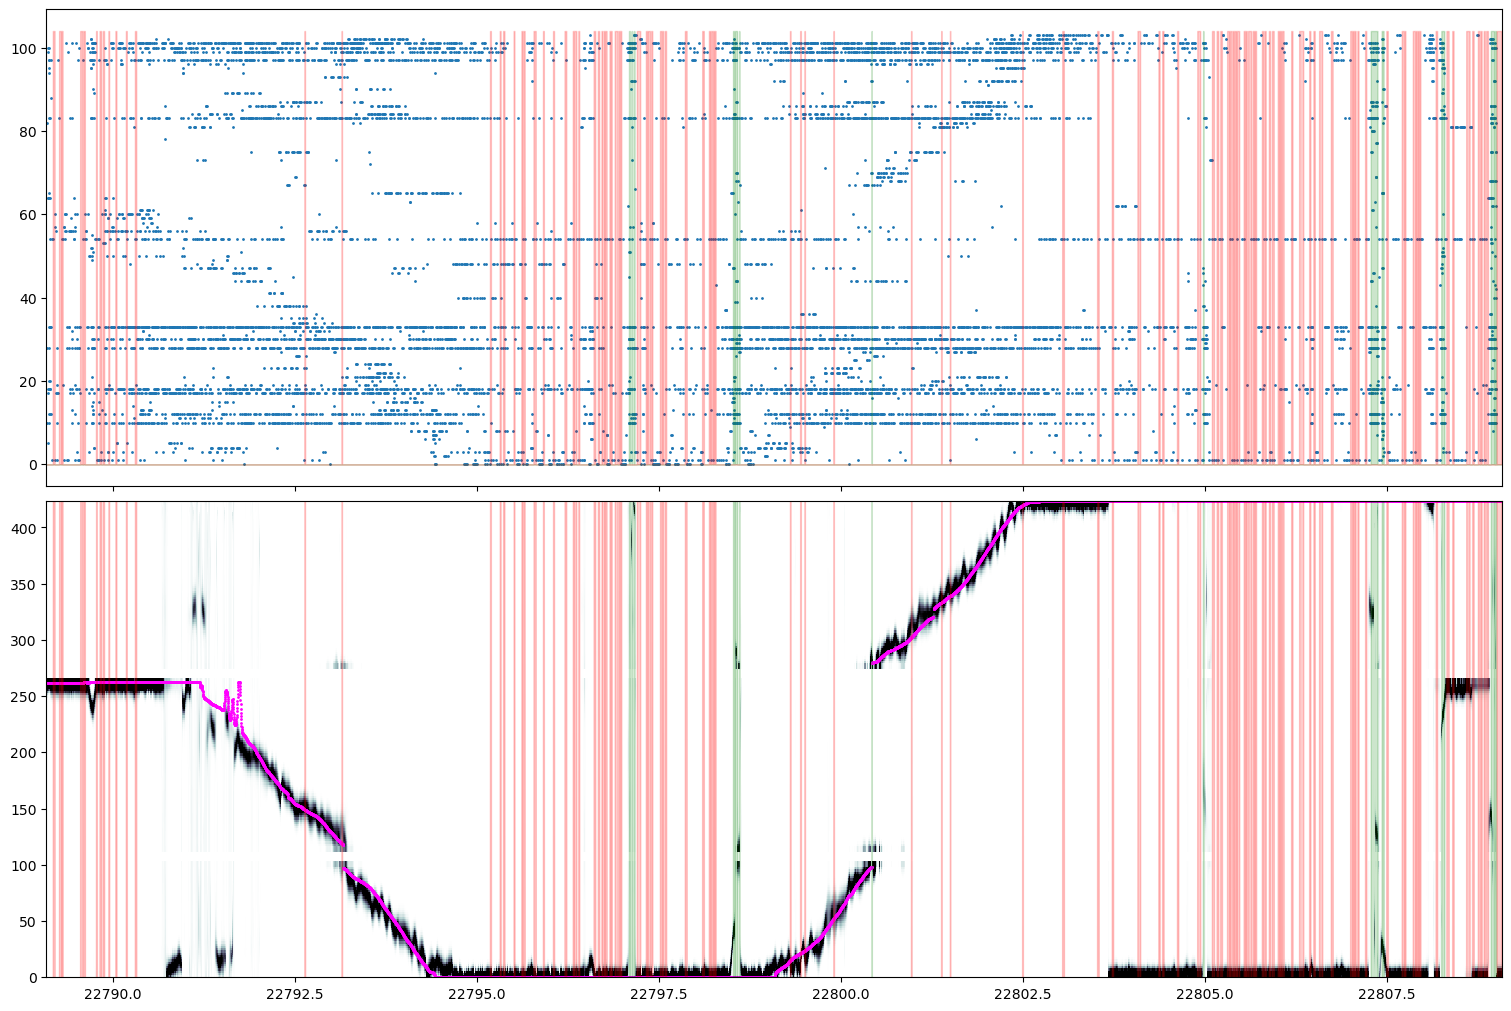

In [143]:
import matplotlib.pyplot as plt
import numpy as np

time_slice = slice(200_000, 210_000)

fig, axes = plt.subplots(2, 1, constrained_layout=True, sharex=True, figsize=(15, 10))
t, x = np.meshgrid(time[time_slice], env.place_bin_centers_)

neuron_sort_ind = np.argsort(
    env.place_bin_centers_[non_local_rates_hmm[-1].argmax(axis=0)].squeeze()
)
spike_time_ind, neuron_ind = np.nonzero(spikes[time_slice][:, neuron_sort_ind])
axes[0].scatter(time[time_slice][spike_time_ind], neuron_ind, s=1)
axes[0].fill_between(time[time_slice], (spikes.shape[1]) * (predicted_state_hmm[time_slice] == 2), alpha=0.2, color='green')
axes[0].fill_between(time[time_slice], (spikes.shape[1]) * (predicted_state_hmm[time_slice] == 1), alpha=0.2, color='red')

axes[1].pcolormesh(t, x, (acausal_posterior[time_slice, state_ind == 0] + acausal_posterior[time_slice, state_ind == 1]).T, vmin=0.0, vmax=0.1, cmap="bone_r")
axes[1].scatter(time[time_slice], position[time_slice], s=1, color="magenta")

axes[1].fill_between(time[time_slice], env.place_bin_edges_.max() * (predicted_state_hmm[time_slice] == 2), alpha=0.2, color='green')
axes[1].fill_between(time[time_slice], env.place_bin_edges_.max() * (predicted_state_hmm[time_slice] == 1), alpha=0.2, color='red')

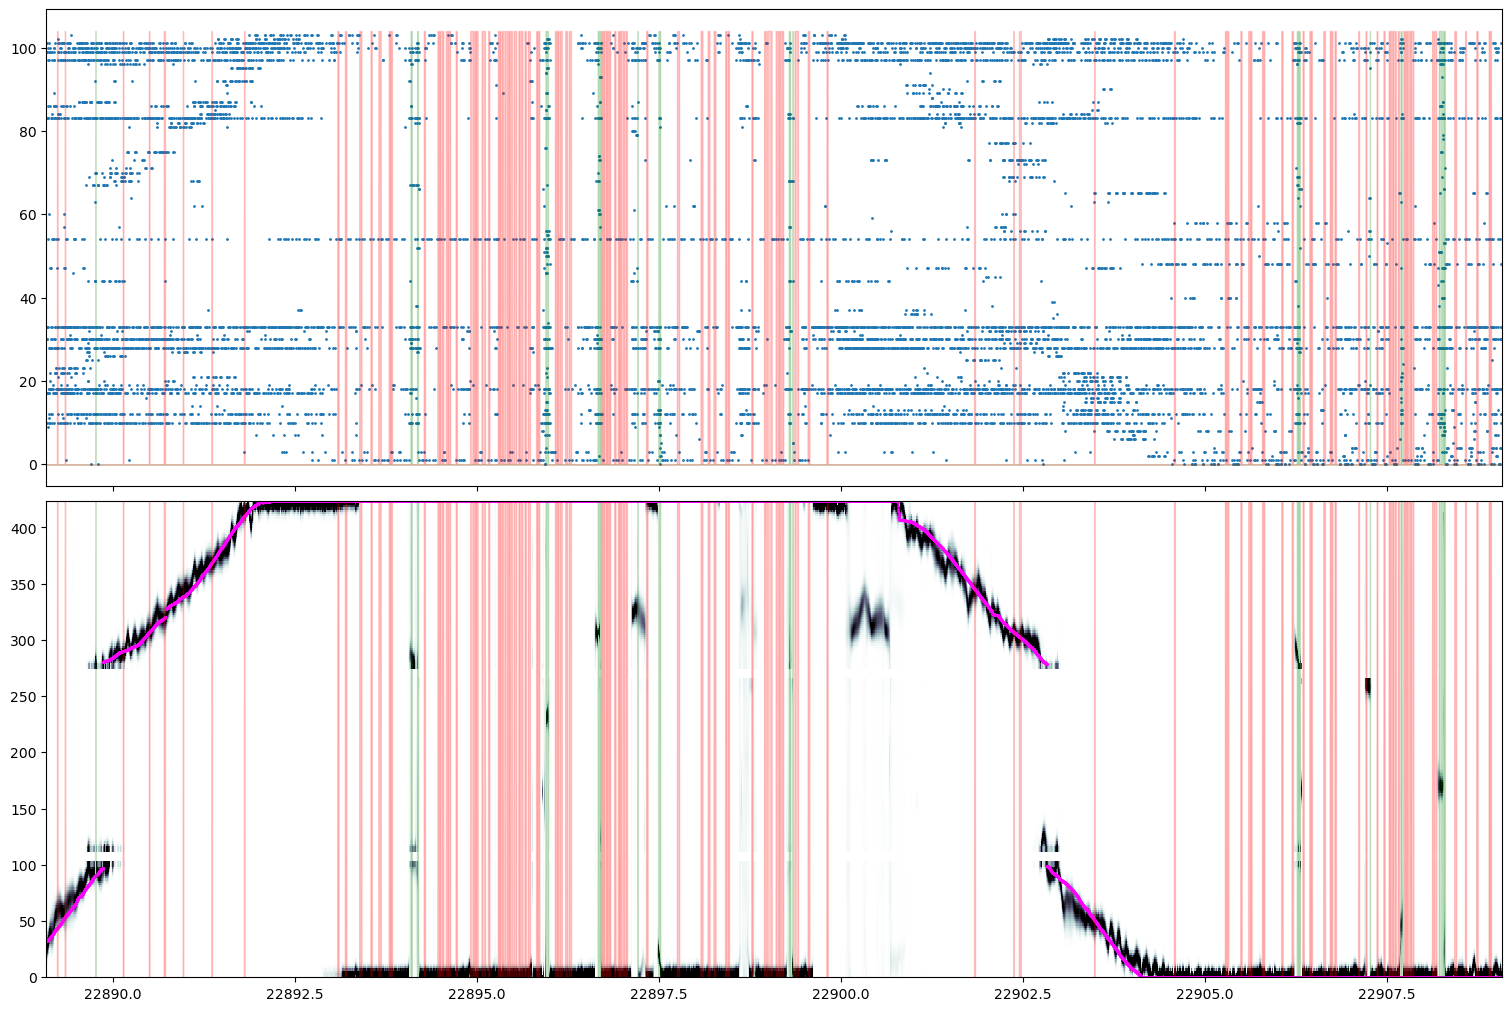

In [148]:
import matplotlib.pyplot as plt
import numpy as np

time_slice = slice(250_000, 260_000)

fig, axes = plt.subplots(2, 1, constrained_layout=True, sharex=True, figsize=(15, 10))
t, x = np.meshgrid(time[time_slice], env.place_bin_centers_)

neuron_sort_ind = np.argsort(
    env.place_bin_centers_[non_local_rates_hmm[-1].argmax(axis=0)].squeeze()
)
spike_time_ind, neuron_ind = np.nonzero(spikes[time_slice][:, neuron_sort_ind])
axes[0].scatter(time[time_slice][spike_time_ind], neuron_ind, s=1)
axes[0].fill_between(time[time_slice], (spikes.shape[1]) * (predicted_state_hmm[time_slice] == 2), alpha=0.2, color='green')
axes[0].fill_between(time[time_slice], (spikes.shape[1]) * (predicted_state_hmm[time_slice] == 1), alpha=0.2, color='red')

axes[1].pcolormesh(t, x, (acausal_posterior[time_slice, state_ind == 0] + acausal_posterior[time_slice, state_ind == 1]).T, vmin=0.0, vmax=0.1, cmap="bone_r")
axes[1].scatter(time[time_slice], position[time_slice], s=1, color="magenta")

axes[1].fill_between(time[time_slice], env.place_bin_edges_.max() * (predicted_state_hmm[time_slice] == 2), alpha=0.2, color='green')
axes[1].fill_between(time[time_slice], env.place_bin_edges_.max() * (predicted_state_hmm[time_slice] == 1), alpha=0.2, color='red')

In [152]:
discrete_state_transitions_hmm[1, 1]

0.9999

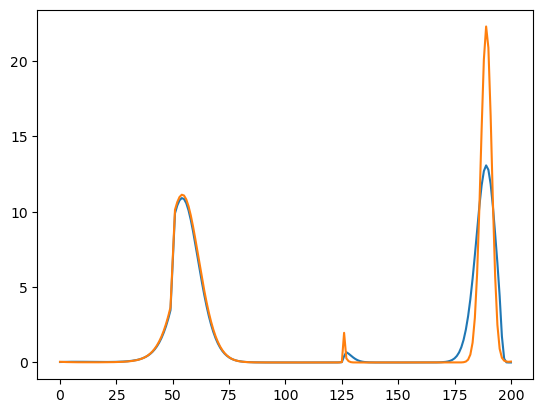

In [135]:
neuron_ind = 33
plt.plot(non_local_rates_hmm[0][:, neuron_ind] * 500)
plt.plot(non_local_rates_hmm[-1][:, neuron_ind] * 500)

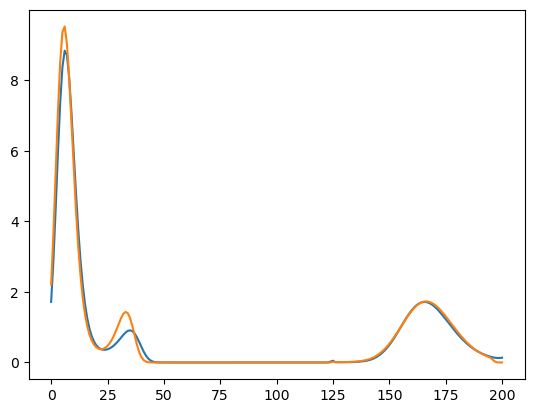

In [136]:
neuron_ind = 48
plt.plot(non_local_rates_hmm[0][:, neuron_ind] * 500)
plt.plot(non_local_rates_hmm[-1][:, neuron_ind] * 500)

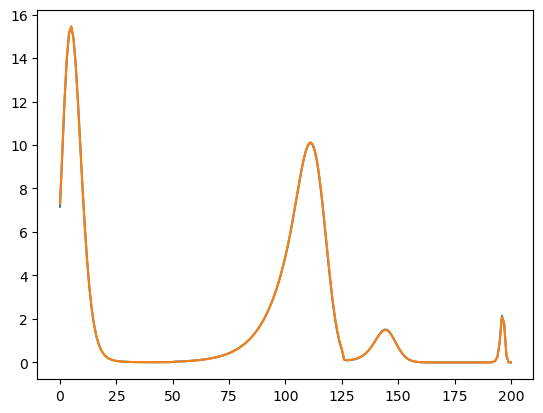

In [96]:
neuron_ind = 80
plt.plot(non_local_rates_hmm[0][:, neuron_ind] * 500)
plt.plot(non_local_rates_hmm[1][:, neuron_ind] * 500)

array([False, False,  True, ..., False, False, False])